#Zomato - EDA

 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 Loading dataset

In [4]:
zomato = pd.read_csv("Zomato dataset.csv")

In [5]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Data Cleaning

In [6]:
def handleRate(value):
    value = str(value).split("/")   # Convert the value to a string and split the string by '/'
    value = value[0]                # keep only the part before the '/'
    return float(value)             # Return the remaining part as a float

In [7]:
zomato["rate"] = zomato["rate"].apply(handleRate)  # Apply the handleRate function to each value in the 'rate' column

In [9]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [10]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [11]:
zomato.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


 Observations from Dataset Information:

 1. The dataset has a total of 148 rows and 7 columns.
 2. All columns have non-null values, meaning there are no missing values in the dataset.
 3. The 'rate' column has been successfully converted to a numeric type (float64) after data cleaning.
 4. The 'votes' and 'approx_cost(for two people)' columns are integers (int64), representing numeric values.
 5. The remaining columns ('name', 'online_order', 'book_table', and 'listed_in(type)') are of object type meaning they contain textual data.


In [12]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Type Of Restaurant

<ipython-input-13-8382d24b93e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "listed_in(type)", data = zomato, palette = "magma")


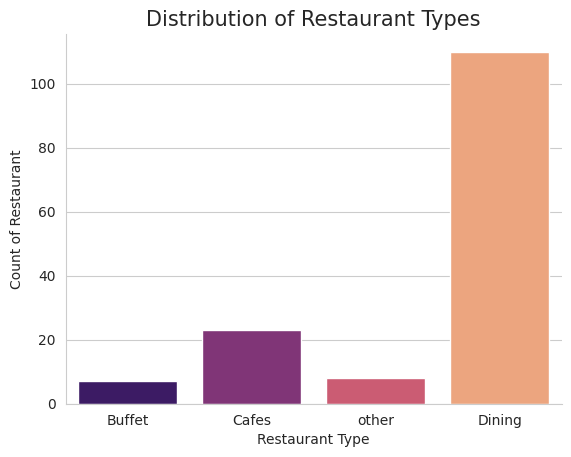

In [13]:
sns.set_style("whitegrid")

sns.countplot(x = "listed_in(type)", data = zomato, palette = "magma")

plt.xlabel("Restaurant Type", fontsize = 10)
plt.ylabel("Count of Restaurant", fontsize = 10)
plt.title("Distribution of Restaurant Types", fontsize = 15)

sns.despine()

plt.show()

# Analysis Of Restaurant Type Distribution:

The count plot shows that 'Dining' restaurants are the most popular among customers,  followed by 'Cafes' and then 'Buffets'. Other restaurant types have similar lower counts.

This indicates a strong preference for dining experiences.

# Total Votes By Restaurant Type

In [14]:
grouped_data = zomato.groupby("listed_in(type)")["votes"].sum()

#This line groups the restaurants by type and calculates the total number of votes for each type.
# groupby() is used to group the data by a specific column—in this case, listed_in(type) (restaurant type).
# ['votes'].sum() sums up all the votes for each restaurant type after grouping them.

In [15]:
vote_sum = pd.DataFrame({"votes": grouped_data})

vote_sum

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


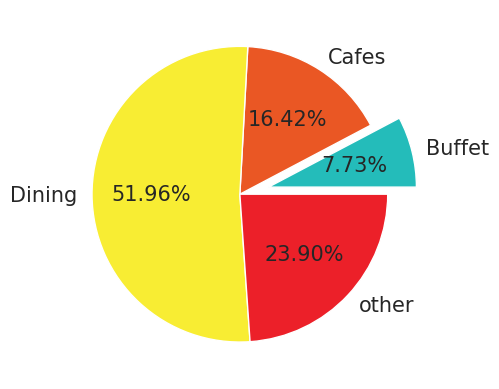

In [16]:
ex1 = [0.2,0.0,0.0,0.0]
color1 = ["#24bcba","#ea5724","#f8ed33","#ec2029"]

plt.pie(vote_sum["votes"], labels = vote_sum.index, autopct = "%0.2f%%", explode = ex1, colors = color1, radius = 1.0,
       textprops = {"fontsize":15})

plt.show()

# Distribution Of Restaurant Ratings

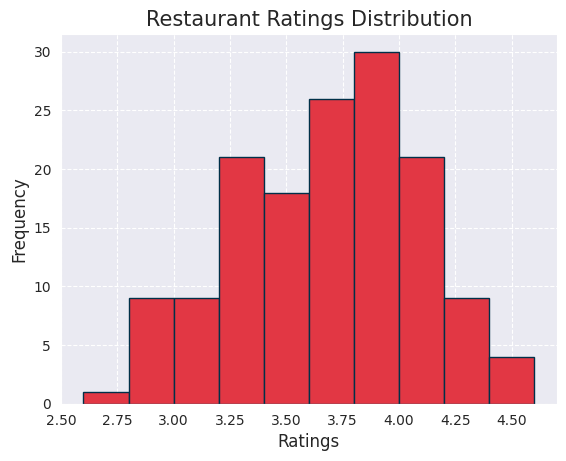

In [18]:
sns.set_style("darkgrid")

plt.hist(zomato["rate"], bins = 10, color = '#E23744', edgecolor = "#003049")

plt.title("Restaurant Ratings Distribution", fontsize = 15)
plt.xlabel("Ratings", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.grid(True, linestyle = "--")

plt.show()

### Most of the restaurant ratings fall between 3.25 and 4.25,indicating that a majority of restaurants have above-average ratings.

# Average Spending on Orders by Couples

<ipython-input-19-3b251b9f13f4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = zomato["approx_cost(for two people)"], palette = "coolwarm", edgecolor = "black")


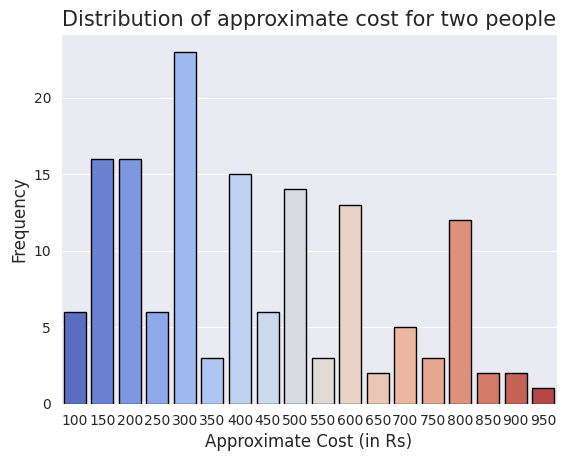

In [19]:
sns.countplot(x = zomato["approx_cost(for two people)"], palette = "coolwarm", edgecolor = "black")

plt.title("Distribution of approximate cost for two people", fontsize = 15)
plt.xlabel("Approximate Cost (in Rs)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)

plt.show()

 * The count plot shows that Rs. 300 is the most common
amount spent by couples on their orders.
 * Following this, Rs. 150 and Rs. 200 are the next most frequent spending amounts.
 * The lowest spending value observed is Rs. 950, which occurs less frequently.

# Comparison of Ratings Between Online and Offline Orders

<ipython-input-20-dedd4f0da3a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "online_order", y = "rate", data = zomato, palette = "magma", linewidth = 3, showmeans = True,


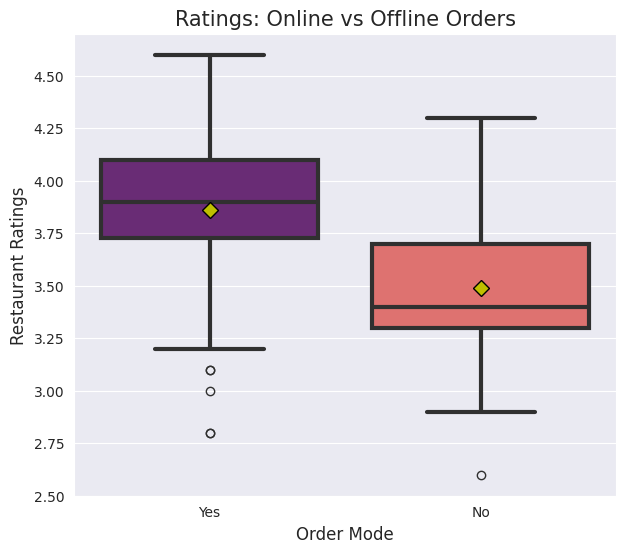

In [20]:
plt.figure(figsize = (7,6))

sns.boxplot(x = "online_order", y = "rate", data = zomato, palette = "magma", linewidth = 3, showmeans = True,
            meanprops = {"marker":"D", "markersize":8, "markeredgecolor":"black", "markerfacecolor":"y"})

plt.title("Ratings: Online vs Offline Orders", fontsize = 15)
plt.xlabel("Order Mode", fontsize = 12)
plt.ylabel("Restaurant Ratings", fontsize = 12)

plt.show()



*    The boxplot shows that restaurants receiving online orders generally have higher ratings compared to those with offline orders.
* The online mode's ratings range between 3.75 and 4.2, while the offline mode's ratings range between 3.25 and 3.75.
* This indicates that customers tend to give higher ratings when ordering online compared to offline.




# Restaurant Categories with More Offline Orders

In [21]:
pivot_table = zomato.pivot_table(index = "listed_in(type)", columns = "online_order", aggfunc = "size", fill_value = 0)

pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


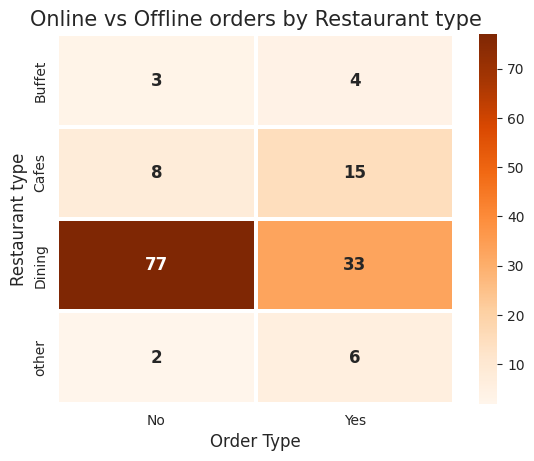

In [22]:
sns.heatmap(pivot_table, annot = True, cmap = "Oranges", linewidth = 1.5, annot_kws = {"size":12, "weight":"bold"})

plt.title("Online vs Offline orders by Restaurant type", fontsize = 15)
plt.xlabel("Order Type", fontsize = 12)
plt.ylabel("Restaurant type", fontsize = 12)

plt.show()



*   Most customers prefer to order offline from dining restaurants, with 77 offline orders compared to 33 online orders.
* This suggests that people enjoy the dining experience at these places.

* Cafes receive more online orders (15) than offline (8). This indicates that many customers prefer to order takeout from cafes.

* Buffets have similar numbers for online (4) and offline (3) orders, showing some interest in ordering online, but not a  strong preference.


# Comparing Ratings and Cost for Online and Offline Orders

In [23]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


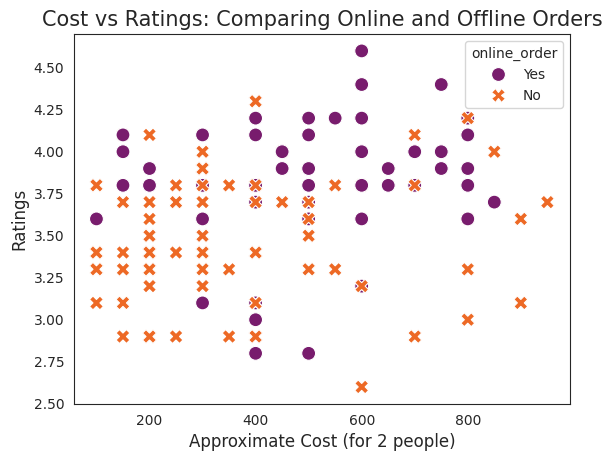

In [24]:
sns.set_style("white")

sns.scatterplot(x = "approx_cost(for two people)", y = "rate", data = zomato, hue = "online_order", size = "online_order",
               sizes = (100,100), style = "online_order", palette = "inferno")

plt.title("Cost vs Ratings: Comparing Online and Offline Orders", fontsize = 15)
plt.xlabel("Approximate Cost (for 2 people)", fontsize = 12)
plt.ylabel("Ratings", fontsize = 12)


plt.show()

* General Trend: There is a slight positive correlation between approximate cost and ratings; as costs increase, ratings tend to be higher.

* Online Orders: Restaurants with online orders (purple dots) generally receive better ratings (around 3.5 to 4.5) and have a broader range of costs.

* Offline Orders: Offline orders (orange crosses) show more variability in ratings, with many restaurants scoring below 4.0,  indicating inconsistent quality.

* Cost Distribution: Online orders tend to include higher-cost items that also receive better ratings,  suggesting that higher-priced restaurants may offer superior quality.

# How many restaurants offer the option to book a table, and what is their average rating?

<ipython-input-25-55d8512ba160>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "book_table", data = zomato, palette = "inferno")


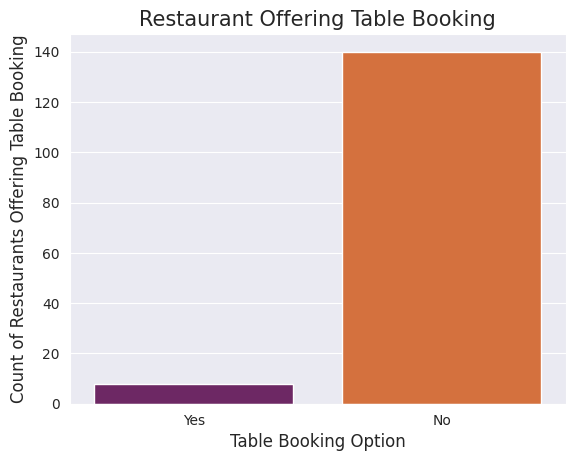

In [25]:
# How many restaurants offer the option to book a table

sns.set_style("darkgrid")

sns.countplot(x = "book_table", data = zomato, palette = "inferno")

plt.title("Restaurant Offering Table Booking", fontsize = 15)
plt.xlabel("Table Booking Option", fontsize = 12)
plt.ylabel("Count of Restaurants Offering Table Booking", fontsize = 12)

plt.show()

In [28]:
# The average rating of those restaurants

booking_rest = zomato[zomato["book_table"] == "Yes"]     # Filter restaurants that offer table booking

booking_rest

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
11,Cafe Shuffle,Yes,Yes,4.2,150,600,Cafes
12,The Coffee Shack,Yes,Yes,4.2,164,500,Cafes
44,Onesta,Yes,Yes,4.6,2556,600,other
57,Wamama,Yes,Yes,4.2,354,800,other
61,Goa 0 Km,Yes,Yes,3.6,163,800,Dining
63,Jeet Restaurant,No,Yes,4.0,808,850,Dining


In [29]:
count_booking = booking_rest.shape[0]    #  Count how many restaurants offer table booking

count_booking

8

In [30]:
print(f"The number of Restaurants that offer table booking is : {count_booking}")

The number of Restaurants that offer table booking is : 8


In [31]:
# Calculate the average rating of those restaurants

avg_rating_booking = booking_rest["rate"].mean()

avg_rating_booking

4.1875

In [32]:
print(f"Average rating of restaurants that offer table booking: {avg_rating_booking:.2f}")

Average rating of restaurants that offer table booking: 4.19


# Table Booking and Its Effect on Customer Votes

<ipython-input-33-9bd07833f33a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "book_table", y = "votes", data = zomato, palette = "magma", linewidth = 1.5)


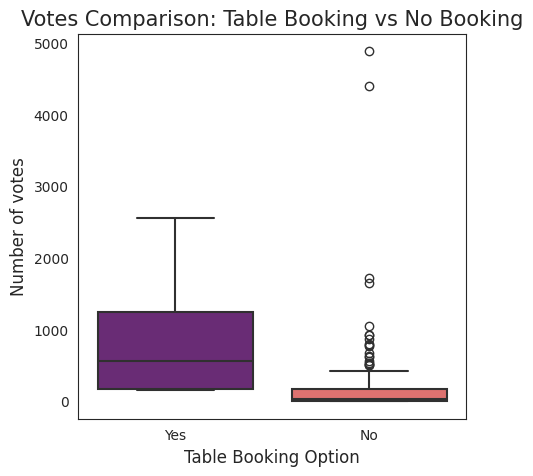

In [33]:
plt.figure(figsize = (5,5))
sns.boxplot(x = "book_table", y = "votes", data = zomato, palette = "magma", linewidth = 1.5)

plt.title("Votes Comparison: Table Booking vs No Booking", fontsize=15)
plt.xlabel("Table Booking Option", fontsize = 12)
plt.ylabel("Number of votes", fontsize = 12)

plt.show()

*  Restaurants that offer table booking ("Yes") generally receive more votes compared to those that don't ("No").

* Restaurants with a table booking option typically receive more votes, indicating that this feature might help attract more customers.

# Examining the Relationship Between Customer Votes and Ratings

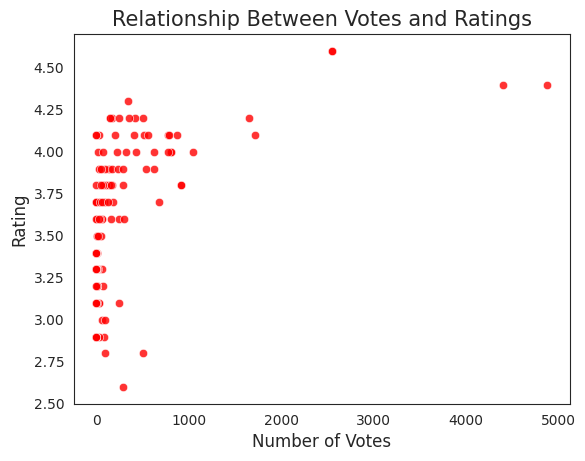

In [34]:
sns.set_style("white")

sns.scatterplot(x = "votes", y = "rate", data = zomato, color = "r", alpha = 0.8)

plt.title("Relationship Between Votes and Ratings", fontsize=15)
plt.xlabel("Number of Votes", fontsize = 12)
plt.ylabel("Rating", fontsize = 12)


plt.show()

1. There’s a slight positive correlation; as the number of votes increases, ratings generally increase too, but it’s not very strong.

2. Most restaurants have ratings between 3.0 and 4.0, regardless of their vote count.

3. Some restaurants with over 2000 votes have ratings above 4.0, indicating that popular restaurants tend to be rated higher, though exceptions exist.

4. Restaurants with ratings below 3.0 can still receive votes, showing that even less popular restaurants can attract some customers.

------------------------------------------------------------------------------

# Questions Addressed

1) What type of restaurant do the majority of customers order from?

2) How many votes has each type of restaurant received from customers?

3) What are the ratings that the majority of restaurants have received?

4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?

5) Which mode (online or offline) has received the maximum rating?

6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

7) What is the relationship between approximate cost and ratings, and how does it differ between online and offline orders?

8) How many restaurants offer the option to book a table, and what is their average rating?

9) Does having a table booking option affect the number of votes a restaurant receives?

10) What is the relationship between the number of votes and the restaurant ratings?